# How to use GCRCatalogs

by Yao-Yuan Mao

Links to GitHub code repos: [GCRCatalogs](https://github.com/LSSTDESC/gcr-catalogs) and [GCR](https://github.com/yymao/generic-catalog-reader)

**Note: You should be running this notebook at https://jupyter-dev.nersc.gov **

In [1]:
## adding DESCQA env

import sys

sys.path.insert(0, '/global/common/software/lsst/common/miniconda/py3-4.2.12/lib/python3.6/site-packages')

## Note: if you use Python 2, comment the line above and uncomment the line below
#sys.path.insert(0, '/global/common/cori/contrib/lsst/apps/anaconda/py2-envs/DESCQA/lib/python2.7/site-packages')

## Note: if you clone the gcr-catalogs repo and are running this under the `examples` folder,
## you can also add your version of GCRCatalogs:
# sys.path.insert(0, '..')

## The following lines are to check if you're in the lsst group
import subprocess
assert u'lsst' in subprocess.check_output(['groups']).decode().split(), 'You need to be in the `lsst` group for this notebook to work'

## The basics:

- `get_available_catalogs()` lists available catlaogs; returns `dict`.
- `load_catalog()` loads the catalog you want; returns an instance of `GCR.BaseGenericCatalog`

In [2]:
import GCRCatalogs

## check version
print('GCRCatalogs =', GCRCatalogs.__version__, '|' ,'GCR =', GCRCatalogs.GCR.__version__)

GCRCatalogs = 0.6.8 | GCR = 0.6.1


In [3]:
## list all find available catlaogs, sorted by their name

print('\n'.join(sorted(GCRCatalogs.get_available_catalogs())))

buzzard
buzzard_high-res
buzzard_test
dc1
protoDC2


In [4]:
## load 'protoDC2' catalog

gc = GCRCatalogs.load_catalog('protoDC2')

## GCR interface

See also the [full GCR API Documentation](https://yymao.github.io/generic-catalog-reader/index.html).

### quantities

- `get_quantities()` loads the quantities you need; takes a `list` and returns `dict`.
- `has_quantity()` and `has_quantities()` can check if the quantities you need exist; both return `bool`.
- `list_all_quantities()` lists all available catlaogs; returns `list`.

In [5]:
gc.get_quantities(['mag_u_lsst', 'ra', 'dec'])

{'dec': array([-2.49390244, -2.4465878 , -2.47334218, ..., -1.57574439,
        -1.57624245, -1.56156218], dtype=float32),
 'mag_u_lsst': array([ 22.85408396,  20.89889978,  21.49888417, ...,  25.59293414,
         23.05899988,  25.42904369]),
 'ra': array([ 2.04596066, -1.91125453,  0.76751482, ...,  1.62644827,
         1.60419965,  1.60762465], dtype=float32)}

In [6]:
gc.has_quantity('mag_u_lsst')

True

In [7]:
gc.has_quantities(['mag_u_lsst', 'ra', 'dec'])

True

In [8]:
## Only returns `True` if *all* quantities exist
gc.has_quantities(['mag_u_lsst', 'ra', 'dec', 'quantitiy_that_does_not_exist'])

False

In [9]:
print(', '.join(gc.list_all_quantities()))

Mag_true_i_sdss_z0, Mag_true_g_lsst_z0, Mag_true_u_sdss_z0, Mag_true_r_lsst_z0, stellar_mass, position_x, size_bulge_true, galaxy_id, mag_z_lsst, Mag_true_Y_lsst_z0, halo_id, ellipticity_1, convergence, Mag_true_z_lsst_z0, size_disk_true, velocity_x, mag_r_lsst, dec_true, mag_Y_lsst, ellipticity_2, bulge_sersic_index, mag_i_sdss, magnification, is_central, mag_g_lsst, redshift_true, dec, halo_mass, Mag_true_r_sdss_z0, velocity_z, mag_z_sdss, Mag_true_u_lsst_z0, ra_true, mag_u_sdss, shear_2, position_y, Mag_true_z_sdss_z0, mag_r_sdss, velocity_y, disk_sersic_index, redshift, mag_i_lsst, Mag_true_i_lsst_z0, Mag_true_g_sdss_z0, position_z, mag_g_sdss, mag_u_lsst, ra, shear_1


### accessing native quantities

Native quantities are quantities that have not yet be homogenized (to common labels/units).
However, you can still access them as long as you know what you are doing. 

In [10]:
## print out the first 5 native quantities

print('\n'.join(sorted(gc.list_all_native_quantities())[:5]))

LSST_filters/diskLuminositiesStellar:LSST_g:observed
LSST_filters/diskLuminositiesStellar:LSST_g:observed:dustAtlas
LSST_filters/diskLuminositiesStellar:LSST_g:rest
LSST_filters/diskLuminositiesStellar:LSST_g:rest:dustAtlas
LSST_filters/diskLuminositiesStellar:LSST_i:observed


In [11]:
gc.get_quantities(['emissionLines/diskLineLuminosity:balmerAlpha6563:rest',
                   'emissionLines/diskLineLuminosity:balmerAlpha6563:rest:contam_nitrogenII6584'])

{'emissionLines/diskLineLuminosity:balmerAlpha6563:rest': array([  2.95460152e+04,   1.36217248e+07,   7.35076121e+06, ...,
          3.28912552e+07,   3.07296106e+08,   3.50137854e+07]),
 'emissionLines/diskLineLuminosity:balmerAlpha6563:rest:contam_nitrogenII6584': array([  2.98620241e+04,   1.39448999e+07,   7.57534427e+06, ...,
          3.40582469e+07,   3.19260779e+08,   3.63504006e+07])}

You can also rename the native quantities by using `add_quantity_modifier()`. For example:

In [12]:
gc.add_quantity_modifier('balmer_alpha_6563', 'emissionLines/diskLineLuminosity:balmerAlpha6563:rest')
gc.get_quantities(['balmer_alpha_6563'])

{'balmer_alpha_6563': array([  2.95460152e+04,   1.36217248e+07,   7.35076121e+06, ...,
          3.28912552e+07,   3.07296106e+08,   3.50137854e+07])}

To get all native quantities that match a regex

In [13]:
import re

data = gc.get_quantities([q for q in gc.list_all_native_quantities() if re.match('SEDs/totalLuminositiesStellar:SED_\d+_\d+:rest:dustAtlas', q)]) 

### more info about the catalog

- `lightcone` is a `bool`
- `cosmology` is a instance of `astropy.cosmology.FLRW`
- `get_input_kwargs()` returns a `dict` (when no argument) from the orignal yaml config file. 
  If a argument if passed, it returns the corresponding value for key=argument

In [14]:
gc.lightcone

True

In [15]:
gc.cosmology

FlatLambdaCDM(H0=71 km / (Mpc s), Om0=0.265, Tcmb0=0 K, Neff=3.04, m_nu=None, Ob0=0.0448)

In [16]:
print(gc.get_catalog_info('description'))

ProtoDC2 is a down-scaled version of the catalog to be generated for LSST-DESC DC2.
For a description of the catalog and the methods, please see https://goo.gl/fXDQwP



In [17]:
print(gc.get_catalog_info('version'))

2.1.1


In [18]:
print(gc.get_catalog_info())

{'subclass_name': 'alphaq.AlphaQGalaxyCatalog', 'filename': '/global/projecta/projectdirs/lsst/groups/CS/descqa/catalog/ANL_AlphaQ_v2.1.1.hdf5', 'lightcone': True, 'version': '2.1.1', 'creators': ['Eve Kovacs', 'Danila Korytov', 'Katrin Heitmann', 'Andrew Benson'], 'description': 'ProtoDC2 is a down-scaled version of the catalog to be generated for LSST-DESC DC2.\nFor a description of the catalog and the methods, please see https://goo.gl/fXDQwP\n'}


In [19]:
for q in gc.list_all_quantities():
    print(q)
    print(gc.get_quantity_info(q))

Mag_true_i_sdss_z0
{'description': None, 'units': 'AB magnitude'}
Mag_true_g_lsst_z0
{'description': None, 'units': 'AB magnitude'}
Mag_true_u_sdss_z0
{'description': None, 'units': 'AB magnitude'}
Mag_true_r_lsst_z0
{'description': None, 'units': 'AB magnitude'}
stellar_mass
{'description': None, 'units': 'Msun'}
position_x
{'description': None, 'units': 'comoving Mpc/h'}
size_bulge_true
{'description': None, 'units': 'physical kpc'}
galaxy_id
{'description': None, 'units': 'id/index'}
mag_z_lsst
{'description': None, 'units': 'AB magnitude'}
Mag_true_Y_lsst_z0
{'description': None, 'units': 'AB magnitude'}
halo_id
{'description': None, 'units': 'id/index'}
ellipticity_1
{'description': None, 'units': 'unitless'}
convergence
{'description': None, 'units': 'unitless'}
Mag_true_z_lsst_z0
{'description': None, 'units': 'AB magnitude'}
size_disk_true
{'description': None, 'units': 'physical kpc'}
velocity_x
{'description': None, 'units': 'km/s'}
mag_r_lsst
{'description': None, 'units': '

/global/common/software/lsst/common/miniconda/py3-4.2.12/lib/python3.6/site-packages/GCRCatalogs/alphaq.py:145: UserWarning: This value is composed of a function on native quantities. So we have no idea what the units are
  warnings.warn('This value is composed of a function on native quantities. So we have no idea what the units are')


### more tips on using the quantities

#### tip 1
`get_quantities()` returns a dictionary, which you can easily turn into a `astropy.table.Table` or `pandas.DataFrame`

In [20]:
data = gc.get_quantities(['mag_u_lsst', 'ra', 'dec'])

In [21]:
import pandas as pd
pd.DataFrame(data)

,dec,mag_u_lsst,ra
0,-2.493902,22.854084,2.045961
1,-2.446588,20.898900,-1.911255
2,-2.473342,21.498884,0.767515
3,-2.490980,23.390713,-1.924229
4,-2.498992,23.324795,-1.932602
5,-2.497787,24.671431,-1.932419
6,-2.492819,24.665397,-1.933936
7,-2.490286,25.212185,-1.943685
8,-2.484439,24.560172,-1.933810
9,-2.499003,25.115313,-1.929253


In [22]:
from astropy.table import Table
Table(data)

dec,mag_u_lsst,ra
float32,float64,float32
-2.4939,22.854083964,2.04596
-2.44659,20.898899778,-1.91125
-2.47334,21.4988841667,0.767515
-2.49098,23.3907129004,-1.92423
-2.49899,23.3247952146,-1.9326
-2.49779,24.6714314075,-1.93242
-2.49282,24.6653968004,-1.93394
-2.49029,25.2121852079,-1.94369
-2.48444,24.5601718799,-1.93381


#### tip 2

Sometimes you can allow slightly different quantiies (for example, lsst u band and sdss u band) when comparing different catalogs. In this case, you can use `first_available()` to get the first available of the given catalog.

In [23]:
gc.first_available('mag_u_des', 'mag_u_sdss', 'mag_u_lsst')

/global/common/software/lsst/common/miniconda/py3-4.2.12/lib/python3.6/site-packages/GCR.py:199: UserWarning: mag_u_des not available; using mag_u_sdss instead
  warnings.warn('{} not available; using {} instead'.format(quantities[0], q))


'mag_u_sdss'

### Here's a full example

In [24]:
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
catalogs = ('protoDC2', 'buzzard_test')
gc_all = dict(zip(catalogs, (GCRCatalogs.load_catalog(c) for c in catalogs)))

/global/common/software/lsst/common/miniconda/py3-4.2.12/lib/python3.6/site-packages/GCR.py:199: UserWarning: mag_g_lsst not available; using mag_g_des instead
  warnings.warn('{} not available; using {} instead'.format(quantities[0], q))
/global/common/software/lsst/common/miniconda/py3-4.2.12/lib/python3.6/site-packages/GCR.py:199: UserWarning: mag_r_lsst not available; using mag_r_des instead
  warnings.warn('{} not available; using {} instead'.format(quantities[0], q))


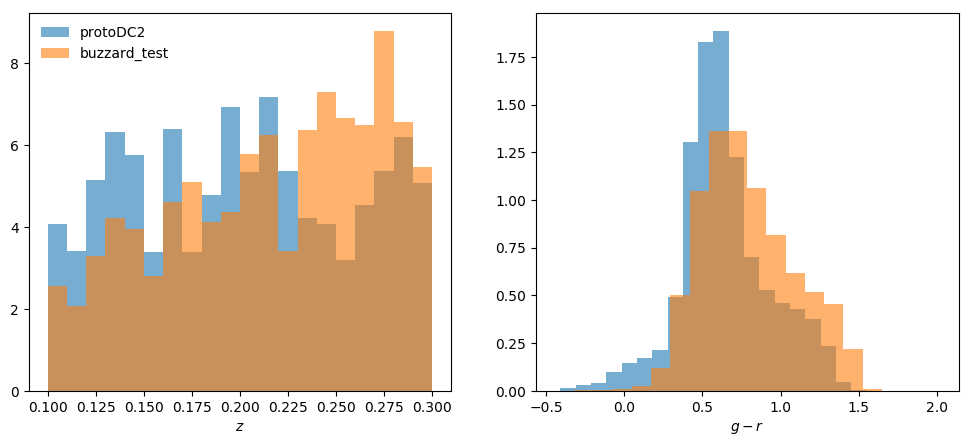

In [26]:
fig, ax = plt.subplots(ncols=2, figsize=(12,5), dpi=100)

for label, gc_this in gc_all.items():
    mag_g = gc_this.first_available('mag_g_lsst', 'mag_g_sdss', 'mag_g_des')
    mag_r = gc_this.first_available('mag_r_lsst', 'mag_r_sdss', 'mag_r_des')
    redshift = gc_this.first_available('redshift_true', 'redshift')
    quantities_needed = [mag_g, mag_r, redshift]
    
    data = Table(gc_this.get_quantities(quantities_needed, [redshift + '> 0.1', redshift + '< 0.3']))
    
    data = data[np.isfinite(data[mag_g]) & np.isfinite(data[mag_r])]
    data = data[data[mag_r] < 22.0]
    
    ax[0].hist(data[redshift], 20, normed=True, alpha=0.6, label=label);
    ax[1].hist(data[mag_g] - data[mag_r], 20, normed=True, alpha=0.6);

ax[0].legend(frameon=False);
ax[0].set_xlabel('$z$');
ax[1].set_xlabel('$g-r$');

## Add-on catalogs

This is an example to load "add-on" catalogs which can be joined to the main catalog with pandas

In [27]:
import pandas as pd

In [28]:
gc = GCRCatalogs.load_catalog('protoDC2')
gc_tidal = GCRCatalogs.load_catalog('protoDC2_addon_tidal')

In [29]:
data = pd.DataFrame(gc.get_quantities(['galaxy_id', 'ra', 'dec'])).set_index('galaxy_id')
data_tidal = pd.DataFrame(gc_tidal.get_quantities(gc_tidal.list_all_quantities())).set_index('galaxy_id').join(data)